In [5]:
## example of polynomial model 

In [7]:
%matplotlib inline
import torch
import numpy as np
import sys
import matplotlib.pyplot as plt

print(torch.__version__)

1.4.0


In [3]:
# initialize params
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1) 

labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

In [4]:
features[:2], poly_features[:2], labels[:2]

(tensor([[-0.5543],
         [-0.2845]]), tensor([[-0.5543,  0.3073, -0.1703],
         [-0.2845,  0.0810, -0.0230]]), tensor([2.3457, 4.2549]))

In [26]:
# define model
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    
    plt.figure(figsize = (10,8))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)
        
    plt.show()

In [27]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    # initialize model
    net = torch.nn.Linear(train_features.shape[-1], 1) 
    
    batch_size = min(10, train_labels.shape[0])    
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)  
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True) 
    optimizer = torch.optim.SGD(net.parameters(), lr=0.01) 
    train_ls, test_ls = [], [] # loss function
    
    for _ in range(num_epochs):
        for X, y in train_iter:                                                 
            l = loss(net(X), y.view(-1, 1))  # calculate loss 
            optimizer.zero_grad()    # reset gradient to zero
            l.backward()    # calculate gradient
            optimizer.step()   # update params 
            
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item()) 
        test_ls.append(loss(net(test_features), test_labels).item())
    
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])    
    
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data)

final epoch: train loss 0.0002704040380194783 test loss 0.0003584642254281789


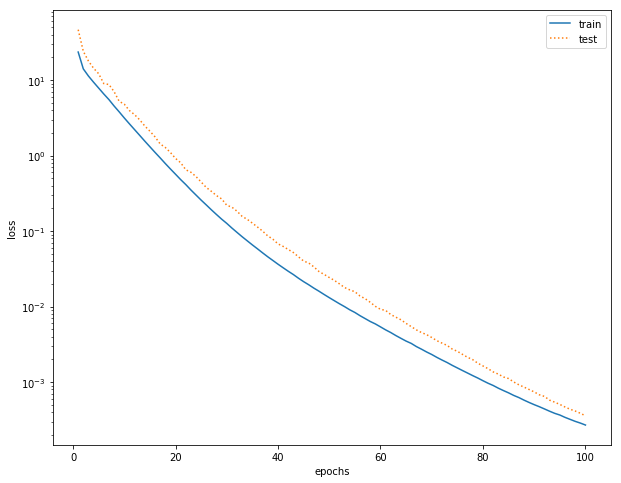

weight: tensor([[ 1.2265, -3.3948,  5.5913]]) 
bias: tensor([4.9999])


In [28]:
# plot for normal model

fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], labels[:n_train], labels[n_train:])

In [29]:
# example of underfitting

(features[:n_train, :], features[n_train:, :], labels[:n_train], labels[n_train:])

(tensor([[-0.5543],
         [-0.2845],
         [ 0.7551],
         [-1.1977],
         [-0.5766],
         [-0.6898],
         [-0.7830],
         [-0.6414],
         [-0.1949],
         [ 2.1363],
         [ 0.0137],
         [ 0.4018],
         [ 0.6231],
         [-0.4387],
         [ 1.1522],
         [ 0.2042],
         [-0.9549],
         [ 0.2666],
         [-0.5827],
         [-0.2596],
         [ 1.9177],
         [-0.6824],
         [ 1.1398],
         [-0.9993],
         [ 1.5546],
         [-0.8952],
         [ 0.1056],
         [ 0.5086],
         [ 1.8047],
         [ 0.4416],
         [ 0.1546],
         [ 0.7117],
         [-0.5303],
         [-0.3968],
         [ 0.7892],
         [-0.5360],
         [-0.6966],
         [-1.7831],
         [-0.4491],
         [ 1.1055],
         [-1.5025],
         [-0.9864],
         [ 0.9941],
         [-0.5143],
         [-0.3051],
         [ 0.9382],
         [ 0.3095],
         [ 0.8685],
         [-1.4016],
         [-0.7917],


final epoch: train loss 1.533076524734497 test loss 459.5708312988281


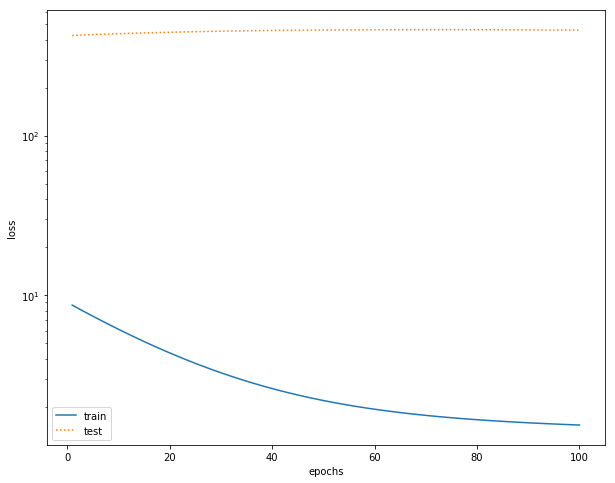

weight: tensor([[-1.0332,  0.6096, -0.4805]]) 
bias: tensor([2.3906])


In [30]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2], labels[n_train:])

In [32]:
## regularization example

In [33]:
n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

In [34]:
def init_params():
    w = torch.randn((num_inputs, 1), requires_grad=True) # initialize params and with gradient
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [35]:
# define L2 regularization
def l2_penalty(w):
    return (w**2).sum() / 2

In [ ]:
# build model with L2 regularization

batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = linreg, squared_loss

dataset = torch.utils.data.TensorDataset(train_features, train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X, w, b), y) + lambd * l2_penalty(w) # with L2 regularization
            l = l.sum()
            
            if w.grad is not None: # reset gradient to zero
                w.grad.data.zero_()
                b.grad.data.zero_()
                
            l.backward()
            d2l.sgd([w, b], lr, batch_size)
            
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().item())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().item())
        
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().item())

In [37]:
## other way built-in weight_decay to perform regularization

def fit_and_plot_pytorch(wd):
    
    net = nn.Linear(num_inputs, 1)
    nn.init.normal_(net.weight, mean=0, std=1)
    nn.init.normal_(net.bias, mean=0, std=1)
    optimizer_w = torch.optim.SGD(params=[net.weight], lr=lr, weight_decay=wd) # perform weight decay for weights
    optimizer_b = torch.optim.SGD(params=[net.bias], lr=lr)  # does not perform weight decay for bias
    
    train_ls, test_ls = [], []
    
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()
            
            l.backward()
            
            # uodate weights and bias separately
            optimizer_w.step()
            optimizer_b.step()
            
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
        
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net.weight.data.norm().item())

In [38]:
## Another regularization method for NN: Dropout

In [39]:
# handcode dropout example

def dropout(X, drop_prob):
    X = X.float()
    assert 0 <= drop_prob <= 1
    keep_prob = 1 - drop_prob
    
    if keep_prob == 0: # drop all values
        return torch.zeros_like(X)
    mask = (torch.rand(X.shape) < keep_prob).float()
    
    return mask * X / keep_prob

In [40]:
# testing our function
X = torch.arange(16).view(2, 8)
dropout(X, 0)

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])

In [41]:
dropout(X, 0.5)

tensor([[ 0.,  0.,  0.,  6.,  8., 10., 12., 14.],
        [ 0., 18.,  0., 22.,  0.,  0.,  0.,  0.]])

In [42]:
dropout(X, 1.0)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0.]])

In [43]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

W1 = torch.tensor(np.random.normal(0, 0.01, size=(num_inputs, num_hiddens1)), dtype=torch.float, requires_grad=True)
b1 = torch.zeros(num_hiddens1, requires_grad=True)
W2 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens1, num_hiddens2)), dtype=torch.float, requires_grad=True)
b2 = torch.zeros(num_hiddens2, requires_grad=True)
W3 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens2, num_outputs)), dtype=torch.float, requires_grad=True)
b3 = torch.zeros(num_outputs, requires_grad=True)

params = [W1, b1, W2, b2, W3, b3]

In [44]:
drop_prob1, drop_prob2 = 0.2, 0.5 # initiate values

def net(X, is_training=True):
    X = X.view(-1, num_inputs)
    H1 = (torch.matmul(X, W1) + b1).relu()
    if is_training:  # only perform dropout at training
        H1 = dropout(H1, drop_prob1)  # dropout after 1st full connection layer
    H2 = (torch.matmul(H1, W2) + b2).relu()
    if is_training:
        H2 = dropout(H2, drop_prob2)  # dropout again after 2nd full connection layer
    
    return torch.matmul(H2, W3) + b3

In [45]:
def evaluate_accuracy(data_iter, net):
    
    acc_sum, n = 0.0, 0
    
    for X, y in data_iter:
        if isinstance(net, torch.nn.Module):
            net.eval() # in evaluation mode, no dropout
            acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
            net.train() # back to train mode
        else: 
            if('is_training' in net.__code__.co_varnames): # set 'is_training' to false
                acc_sum += (net(X, is_training=False).argmax(dim=1) == y).float().sum().item() 
            else:
                acc_sum += (net(X).argmax(dim=1) == y).float().sum().item() 
        
        n += y.shape[0]
    
    return acc_sum / n

In [ ]:
# try on the FashionMNIST dataset
num_epochs, lr, batch_size = 5, 100.0, 256  
loss = torch.nn.CrossEntropyLoss()
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size, root='./data')
train_ch3(
    net,
    train_iter,
    test_iter,
    loss,
    num_epochs,
    batch_size,
    params,
    lr)

In [ ]:
# built-in dropout torch nn example

net = nn.Sequential(
        d2l.FlattenLayer(),
        nn.Linear(num_inputs, num_hiddens1),
        nn.ReLU(),
        nn.Dropout(drop_prob1),
        nn.Linear(num_hiddens1, num_hiddens2), 
        nn.ReLU(),
        nn.Dropout(drop_prob2), # built-in feature 
        nn.Linear(num_hiddens2, 10)
        )

for param in net.parameters():
    nn.init.normal_(param, mean=0, std=0.01)

In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)